In [1]:
# Import libraries
import pandas as pd
import mlflow
import sqlite3 as sql
from datetime import timedelta, datetime
import os
import plotly.express as px

In [2]:
sql.sqlite_version

'3.39.3'

# Connection data 

In [3]:
conn = sql.connect('Application_prod.db')

data = pd.read_sql("""SELECT * 
                      FROM Raw_data""", conn)
data

index        fullVisitorId  bounces  time_on_site  pageviews  medium  \
0           0  1841398939845413817        0         11142      330.0  (none)   
1           1  1841398939845413817        0         11142       59.0  (none)   
2           2  1841398939845413817        0         11142       55.0  (none)   
3           3  1841398939845413817        0         11142      144.0  (none)   
4           4  1841398939845413817        0         11142       67.0  (none)   
...       ...                  ...      ...           ...        ...     ...   
172321  42628  9188970518717118040        1             0        1.0  (none)   
172322  42629  5292485821672248839        1             0        1.0  (none)   
172323  42630  5539970384252655476        1             0        1.0  (none)   
172324  42631  5896625306031106609        1             0        1.0  (none)   
172325  42632  9208529202780866062        1             0        1.0  (none)   

       channelGrouping deviceCategory        country                 date  
0               Direct        desktop  United States  2022-10-10 00:00:00  
1               Direct        desktop  United States  2022-10-10 00:00:00  
2               Direct        desktop  United States  2022-10-10 00:00:00  
3               Direct        desktop  United States  2022-10-10 00:00:00  
4               Direct        desktop  United States  2022-10-10 00:00:00  
...                ...            ...            ...                  ...  
172321          Direct        desktop  United States  2022-12-27 00:00:00  
172322          Direct        desktop      (not set)  2022-12-07 00:00:00  
172323          Direct        desktop      (not set)  2022-12-07 00:00:00  
172324          Direct        desktop      (not set)  2022-12-07 00:00:00  
172325          Direct        desktop      (not set)  2022-12-07 00:00:00  

[172326 rows x 10 columns]

In [4]:
conn = sql.connect('Application_prod.db')

predict_data = pd.read_sql("""SELECT * 
                      FROM Result_data""", conn)
predict_data

index        fullVisitorId                 date  Predict  \
0           0  1841398939845413817  2022-10-10 00:00:00        0   
1           1  1841398939845413817  2022-10-10 00:00:00        0   
2           2  1841398939845413817  2022-10-10 00:00:00        0   
3           3  1841398939845413817  2022-10-10 00:00:00        0   
4           4  1841398939845413817  2022-10-10 00:00:00        0   
...       ...                  ...                  ...      ...   
171619  42628  9188970518717118040  2022-12-27 00:00:00        0   
171620  42629  5292485821672248839  2022-12-07 00:00:00        0   
171621  42630  5539970384252655476  2022-12-07 00:00:00        0   
171622  42631  5896625306031106609  2022-12-07 00:00:00        0   
171623  42632  9208529202780866062  2022-12-07 00:00:00        0   

        Predict_proba  
0            0.469697  
1            0.469697  
2            0.458613  
3            0.469697  
4            0.469697  
...               ...  
171619       0.025811  
171620       0.025811  
171621       0.025811  
171622       0.025811  
171623       0.025811  

[171624 rows x 5 columns]

In [5]:
predict_data.index.value_counts().sort_values(ascending=False)

0         1
39        1
20        1
41        1
19        1
         ..
171616    1
171617    1
171618    1
171619    1
171623    1
Length: 171624, dtype: int64

In [6]:
data.index.value_counts().sort_values(ascending=False)

0         1
7         1
20        1
41        1
19        1
         ..
172319    1
172320    1
172321    1
172322    1
172325    1
Length: 172326, dtype: int64

In [7]:
data["id"]= data['index']
predict_data['id'] = predict_data["index"]

In [8]:
predict_data[["id","Predict"]]

id  Predict
0           0        0
1           1        0
2           2        0
3           3        0
4           4        0
...       ...      ...
171619  42628        0
171620  42629        0
171621  42630        0
171622  42631        0
171623  42632        0

[171624 rows x 2 columns]

In [9]:
d = data.set_index("index")
p = predict_data.set_index("index")
data_new = d.merge(p)

In [10]:
data_new

fullVisitorId  bounces  time_on_site  pageviews  medium  \
0       1841398939845413817        0         11142      330.0  (none)   
1       1841398939845413817        0         11142       59.0  (none)   
2       1841398939845413817        0         11142       55.0  (none)   
3       1841398939845413817        0         11142      144.0  (none)   
4       1841398939845413817        0         11142       67.0  (none)   
...                     ...      ...           ...        ...     ...   
171619  9188970518717118040        1             0        1.0  (none)   
171620  5292485821672248839        1             0        1.0  (none)   
171621  5539970384252655476        1             0        1.0  (none)   
171622  5896625306031106609        1             0        1.0  (none)   
171623  9208529202780866062        1             0        1.0  (none)   

       channelGrouping deviceCategory        country                 date  \
0               Direct        desktop  United States  2022-10-10 00:00:00   
1               Direct        desktop  United States  2022-10-10 00:00:00   
2               Direct        desktop  United States  2022-10-10 00:00:00   
3               Direct        desktop  United States  2022-10-10 00:00:00   
4               Direct        desktop  United States  2022-10-10 00:00:00   
...                ...            ...            ...                  ...   
171619          Direct        desktop  United States  2022-12-27 00:00:00   
171620          Direct        desktop      (not set)  2022-12-07 00:00:00   
171621          Direct        desktop      (not set)  2022-12-07 00:00:00   
171622          Direct        desktop      (not set)  2022-12-07 00:00:00   
171623          Direct        desktop      (not set)  2022-12-07 00:00:00   

           id  Predict  Predict_proba  
0           0        0       0.469697  
1           1        0       0.469697  
2           2        0       0.458613  
3           3        0       0.469697  
4           4        0       0.469697  
...       ...      ...            ...  
171619  42628        0       0.025811  
171620  42629        0       0.025811  
171621  42630        0       0.025811  
171622  42631        0       0.025811  
171623  42632        0       0.025811  

[171624 rows x 12 columns]

In [357]:
#data_new.to_csv("data_app.csv", index=False)

# Top 10 Nombre pageviews par pays

In [12]:
df_pie_us_vs_all = data_new.copy()[data_new['country']!="(not set)"]
df_pie_us_vs_all['country'] = df_pie_us_vs_all["country"].apply(lambda x: "United States" if x == "United States" else "other")

In [13]:
df_pie_undifined_country = data_new.copy()
df_pie_undifined_country['country'] = df_pie_undifined_country["country"].apply(lambda x: "Non-définie" if x == "(not set)" else "Définie")

In [14]:
list_of_country = [[37.09024,-95.712891,"United States"],
[20.593684,78.96288,"India"],
[46.227638,2.213749,"France"],
[35.86166,104.195397,"China"],
[61.52401,105.318756,"Russia"],
[51.165691,10.451526,"Germany"],
[61.92411,25.748151,"Finland"],
[55.378051,3.435973,"United Kingdom"],
[52.132633,5.291266,"Netherlands"],
[56.130366,106.346771,"Canada"]]
df3 = pd.DataFrame(list_of_country, columns = ["Latitude", 'Longitude', 'country'])


In [15]:
data_with_coordonate = data_new.copy().merge(df3,on ="country",how = "left")

In [16]:
data_for_map = data_with_coordonate[data_with_coordonate['country'] != "(not set)"]

In [17]:
data_for_map_grouped = data_for_map.groupby("country").agg({"fullVisitorId": ["count","nunique"],
                                    "time_on_site": ["mean","sum","max","min"],
                                    "pageviews": ['mean','sum',"max","min"],
                                    "Latitude": ['first'],
                                    "Longitude": ['first']})

In [21]:
fig = px.scatter_mapbox(lat = data_for_map_grouped["Latitude"]['first'],lon = data_for_map_grouped["Longitude"]['first'],
                        size=data_for_map_grouped["time_on_site"]['mean'],
                        color=data_for_map_grouped["pageviews"]['mean'],
                        color_continuous_scale=px.colors.sequential.Viridis,mapbox_style ='open-street-map',
                        size_max=50,zoom=1)

fig.show()

In [ ]:
mapbox_style: str (default `'basic'`, needs Mapbox API token)
    Identifier of base map style, some of which require a Mapbox API token
    to be set using `plotly.express.set_mapbox_access_token()`. Allowed
    values which do not require a Mapbox API token are `'open-street-map'`,
    `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
    terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
    which do require a Mapbox API token are `'basic'`, `'streets'`,
    `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
    streets'`.

In [ ]:
data_for_map.groupby("country").

In [101]:
df_pie_country = data_new.copy()[data_new["country"].isin(["United States", "France", "Russia",
                                                       "India", "China", "Germany", "Finland",
                                                       "Canada", "Netherlands", "United Kingdom"])]
df_pie_country['country'].value_counts(ascending=False)

United States     117178
France              1467
India                977
Canada               668
Germany              410
Netherlands          341
China                225
Finland              194
United Kingdom       188
Russia               131
Name: country, dtype: int64

In [102]:
df_pie_country['country']

0         United States
1         United States
2         United States
3         United States
4         United States
              ...      
171607    United States
171608    United States
171612    United States
171617    United States
171619    United States
Name: country, Length: 121779, dtype: object

In [103]:
df_pie_country.groupby("country").sum()

bounces  time_on_site  pageviews          id  Predict  \
country                                                                 
Canada              425         73932     1684.0    18232776       49   
China               215          2445      250.0     7336728        0   
Finland             193            10      196.0     6470781        0   
France              978        744202    63091.0    36366353      130   
Germany             360         17442      607.0    12949435       10   
India               536        211785     3247.0    24364348       72   
Netherlands         294         10675      605.0    10965746        9   
Russia              122          3962      148.0     4485420        0   
United Kingdom      113         17660      471.0     5078907       17   
United States     22654      57132201   839726.0  1963700134    44959   

                Predict_proba  
country                        
Canada              65.026879  
China                6.214511  
Finland              5.054221  
France             146.828687  
Germany             20.372939  
India              105.372243  
Netherlands         18.983909  
Russia               4.079735  
United Kingdom      20.421215  
United States    38501.018080

In [106]:
fig = px.pie(df_pie_country, values='pageviews', names='country', title='Top 10 Nombre pageviews par pays')
fig.show()

# Top 10 d'utilisateurs uniques par pays

In [153]:
df_unique_user_country = data_new.copy().groupby(['country', 'fullVisitorId']).count().reset_index().groupby("country").count().reset_index()[["country","fullVisitorId"]]

In [154]:
df_unique_user_country = df_unique_user_country.sort_values('fullVisitorId', ascending=False).head(10)

In [155]:
df_unique_user_country.groupby(['country']).count().reset_index()

country  fullVisitorId
0      (not set)              1
1         Canada              1
2          China              1
3         France              1
4        Germany              1
5          India              1
6  United States              1

In [156]:
figure = px.pie(df_unique_user_country, values='fullVisitorId', names='country', title='Top 10 des visiteurs uniques par pays')
figure.show()

# Top des Visiteurs susceptible d'acheter (predict)

In [116]:
df_user = data_new[["fullVisitorId", "Predict"]].copy().groupby(['fullVisitorId']).count()

In [117]:
df_top_user = df_user.sort_values('fullVisitorId', ascending=False).head(10)

In [118]:
df_top_user

Predict
fullVisitorId              
999890550208051112        1
999828436391199076        1
99977597552985284         1
999752527135307890       11
999690593704823992        1
999625267253601483        1
999459520169954537        1
999455397004280337        1
99942748188888484         1
999380054687520380        1

In [124]:
df_top_user["count"] = df_top_user['Predict']
df_top_user = df_top_user["count"].reset_index()

In [89]:
# df_top_user["fullVisitorId"] = df_top_user['fullVisitorId'].astype(str)

In [125]:
df_top_user

fullVisitorId  count
0  999890550208051112      1
1  999828436391199076      1
2   99977597552985284      1
3  999752527135307890     11
4  999690593704823992      1
5  999625267253601483      1
6  999459520169954537      1
7  999455397004280337      1
8   99942748188888484      1
9  999380054687520380      1

In [128]:
fig = px.bar(df_top_user, x= 'fullVisitorId', y= 'count',
             color="fullVisitorId",
             title='Top des Visiteurs susceptible d\'acheter (predict)')

#fig = px.pie(df_top_user, values='count', names='fullVisitorId',title='Top des Visiteurs susceptible d\'acheter (predict)')


#fig = px.histogram(df_top_user, x="fullVisitorId", y="count", color="fullVisitorId", marginal="rug", hover_data=df_top_user.columns)

fig.show()

# Nombre de prédiction de la semaine

In [310]:
top_predict_by_week = data_new.copy()
top_predict_by_week["date"] = pd.to_datetime(top_predict_by_week["date"])

In [311]:
top_predict_by_week = top_predict_by_week[['date', 'Predict']]

In [313]:
date = "20220917"

today_date = datetime.strptime(date,"%Y%m%d")
last_date = today_date - timedelta(days=7)

top_predict_this_week = top_predict_by_week.copy()[top_predict_by_week['date'].between(last_date,today_date)]

In [317]:
date = "20220909"

today_date = datetime.strptime(date,"%Y%m%d")
last_date = today_date - timedelta(days=7)


top_predict_last_week = top_predict_by_week.copy()[top_predict_by_week['date'].between(last_date,today_date)]

In [320]:
count_predict_this_week = top_predict_this_week.count()[0]
count_predict_last_week = top_predict_last_week.count()[0]

In [333]:
count_predict_last_week

14901

In [338]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = count_predict_this_week,
    domain = {'x': [0, 0], 'y': [0, 0]},
    delta = {'reference': count_predict_last_week, 'relative': True, 'position' : "bottom",'valueformat':'.2%'}))

# fig.add_trace(go.Indicator(
#     mode = "number+delta",
#     value = 350,
#     delta = {'reference': 400, 'relative': True},
#     domain = {'x': [0, 0.5], 'y': [0.5, 1]}))

# fig.add_trace(go.Indicator(
#     mode = "number+delta",
#     value = 450,
#     title = {"text": "Accounts<br><span style='font-size:0.8em;color:gray'>Subtitle</span><br><span style='font-size:0.8em;color:gray'>Subsubtitle</span>"},
#     delta = {'reference': 400, 'relative': True},
#     domain = {'x': [0.6, 1], 'y': [0, 1]}))

fig.show()

# Moyenne des prédictions par semaine

In [22]:
mean_predict_by_week = data_new.copy()
mean_predict_by_week["date"] = pd.to_datetime(mean_predict_by_week["date"])
mean_predict_by_week = mean_predict_by_week[['date', 'Predict']]

In [23]:
mean_predict_by_week

date  Predict
0      2022-10-10        0
1      2022-10-10        0
2      2022-10-10        0
3      2022-10-10        0
4      2022-10-10        0
...           ...      ...
171619 2022-12-27        0
171620 2022-12-07        0
171621 2022-12-07        0
171622 2022-12-07        0
171623 2022-12-07        0

[171624 rows x 2 columns]

In [24]:
date = "20220917"

today_date = datetime.strptime(date,"%Y%m%d")
last_date = today_date - timedelta(days=7)

mean_predict_this_week = mean_predict_by_week.copy()[mean_predict_by_week['date'].between(last_date,today_date)]

In [25]:
date = "20220909"

today_date = datetime.strptime(date,"%Y%m%d")
last_date = today_date - timedelta(days=7)


mean_predict_last_week = mean_predict_by_week.copy()[mean_predict_by_week['date'].between(last_date,today_date)]

In [28]:
mean_predict_this_week = mean_predict_this_week.mean()[0]
mean_predict_last_week = mean_predict_last_week.mean()[0]

C:\Users\Simplon\AppData\Local\Temp\ipykernel_12884\2153652809.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\Simplon\AppData\Local\Temp\ipykernel_12884\2153652809.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [29]:
mean_predict_last_week

0.2945114830673414

In [35]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = mean_predict_this_week,
    domain = {'x': [0, 0], 'y': [0, 0]},
    delta = {'reference': mean_predict_last_week, 'relative': True, 'position' : "bottom",'valueformat':'.2%'}))

fig.show()

# counplot

In [198]:
data_new["deviceCategory"].value_counts().sort_values(ascending=False)

desktop    160376
mobile      10340
tablet        908
Name: deviceCategory, dtype: int64

In [169]:
data_new["channelGrouping"].value_counts().sort_values(ascending=False)

Direct            113438
Organic Search     43272
Referral           12608
Email               1115
(Other)             1016
Social                70
Paid Search           58
Display               47
Name: channelGrouping, dtype: int64

C:\Users\Simplon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



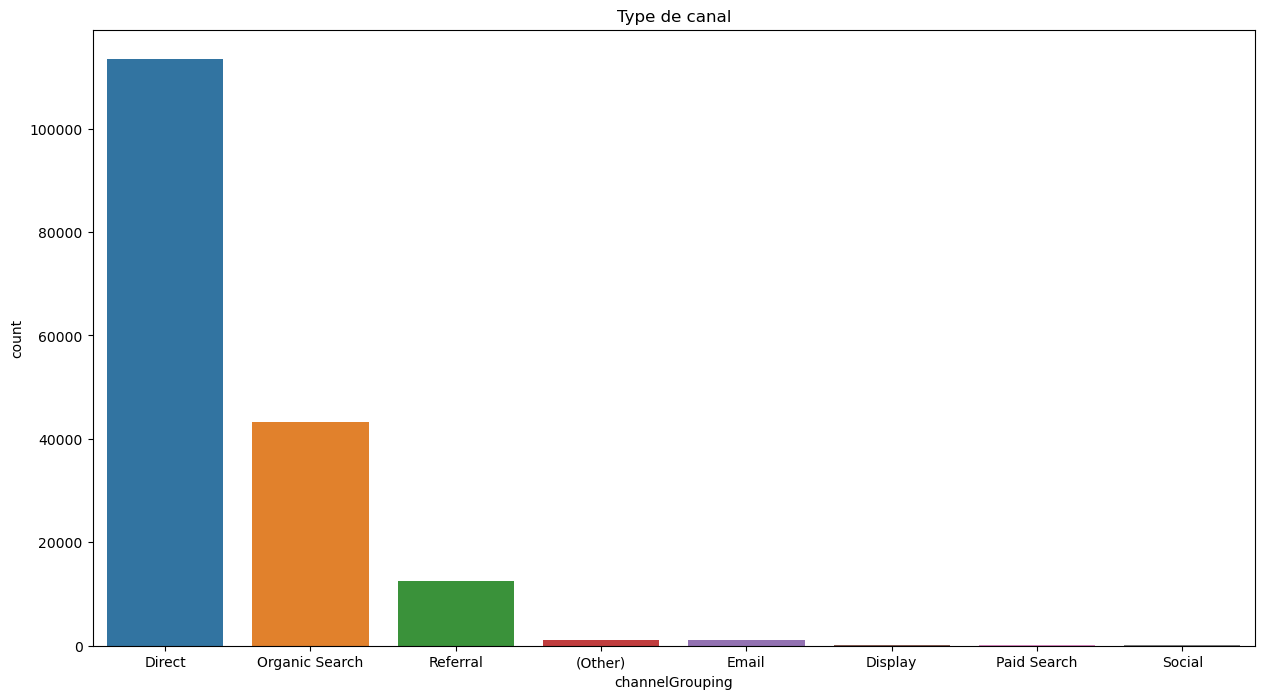

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.countplot(data_new["channelGrouping"])
plt.title(label='Type de canal')
plt.show()

In [181]:
data_new['channelGrouping'].value_counts().index

Index(['Direct', 'Organic Search', 'Referral', 'Email', '(Other)', 'Social',
       'Paid Search', 'Display'],
      dtype='object')

In [178]:
data_new['channelGrouping'].value_counts().values

array([113438,  43272,  12608,   1115,   1016,     70,     58,     47],
      dtype=int64)

In [182]:
import plotly.graph_objs as go

data_bar = [go.Bar(
            x=data_new['channelGrouping'].value_counts().index,
            y=data_new['channelGrouping'].value_counts().values
           )]
layout = go.Layout(title='Countplot of Channels'
                       )
fig_channel = go.Figure(data=data_bar, layout=layout)
fig_channel.show()

In [190]:
rgb_colors = []

for i in data_new['channelGrouping']:
    rgb_colors.append
    
for value in data_new['channelGrouping'].value_counts().values:
    if value == 'value1':
        rgb_colors.append('rgb(255,0,0)') # red
    elif value == 'value2':
        rgb_colors.append('rgb(0,255,0)') # green
    elif value == 'value3':
        rgb_colors.append('rgb(0,0,255)') # blue
    else:
        rgb_colors.append('rgb(255,255,255)') # white
        
data_bar = [go.Bar(
            x=data_new['channelGrouping'].value_counts().index,
            y=data_new['channelGrouping'].value_counts().values,
            marker=dict(color= rgb_colors)
            )]
layout = go.Layout(title='Countplot of Channels')
    
fig = go.Figure(data=data_bar, layout=layout)
fig.show()

In [188]:
data_new['channelGrouping'].value_counts().values[0]
data_new['channelGrouping'].value_counts().values[1]
data_new['channelGrouping'].value_counts().values[2]
data_new['channelGrouping'].value_counts().values[3]
data_new['channelGrouping'].value_counts().values[4]
data_new['channelGrouping'].value_counts().values[5]

70

In [195]:
rgb_colors = ['rgb(51,138,255)',
              'rgb(51,202,255)',
              'rgb(51,202,255)',
              'rgb(51,255,187)',
              'rgb(224,255,51)',
              'rgb(255,216,51)',
              'rgb(255,132,51)',
              'rgb(248,18,18)']

In [196]:
rgb_colors

[]

In [144]:
kpi_TimeOnSite = data_new["pageviews"].copy()

In [145]:
kpi_TimeOnSite

0         330.0
1          59.0
2          55.0
3         144.0
4          67.0
          ...  
171619      1.0
171620      1.0
171621      1.0
171622      1.0
171623      1.0
Name: pageviews, Length: 171624, dtype: float64

In [146]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = kpi_TimeOnSite.max(),
    domain = {'x': [0, 0], 'y': [0, 0]},
    delta = {'reference': kpi_TimeOnSite, 'relative': True, 'position' : "bottom",'valueformat':'.2%'}))

ValueError: 
    Invalid value of type 'pandas.core.series.Series' received for the 'reference' property of indicator.delta
        Received value: 0         330.0
1          59.0
2          55.0
3         144.0
4          67.0
          ...  
171619      1.0
171620      1.0
171621      1.0
171622      1.0
171623      1.0
Name: pageviews, Length: 171624, dtype: float64

    The 'reference' property is a number and may be specified as:
      - An int or float

# Pays vs device & Channel

In [217]:
bar_country = data_new[["country", "channelGrouping", "deviceCategory"]].copy()[data_new["country"].isin(["United States", "France"])]
bar_country['country'].value_counts(ascending=False)

United States    117178
France             1467
Name: country, dtype: int64

In [218]:
bar_country

country channelGrouping deviceCategory
0       United States          Direct        desktop
1       United States          Direct        desktop
2       United States          Direct        desktop
3       United States          Direct        desktop
4       United States          Direct        desktop
...               ...             ...            ...
171607  United States          Direct        desktop
171608  United States          Direct        desktop
171612  United States          Direct        desktop
171617  United States  Organic Search        desktop
171619  United States          Direct        desktop

[118645 rows x 3 columns]

In [221]:
bar_CountryChanDevice = [go.Bar(
            x=data_new[['channelGrouping', "deviceCategory"]].value_counts().index,
            y=data_new['country'].value_counts().values
           )]
layout = go.Layout(title='Countplot of Channels'
                       )
fig_bar_CountryChanDevice = go.Figure(data=bar_CountryChanDevice, layout=layout)
fig_bar_CountryChanDevice.show()

In [223]:
df_us_vs_all = data.copy()
df_undifined = data.copy()
df_top_10_country = data.copy()
df_us_vs_all["country"] = df_us_vs_all["country"].apply(lambda x : "United States" if x == "United States" else "Other Country or not defined")
df_us_vs_all = df_us_vs_all.groupby("country").count()['bounces']

df_undifined['country']= df_undifined['country'].apply(lambda x : "No defined" if x == "(not set)" else "Country is defined")
df_undifined = df_undifined.groupby("country").count()['bounces']
df_undifined.rename({"bounces":"Nombre de connection"},inplace=True)

df_top_10_country = df_top_10_country[(df_top_10_country['country'] != "(not set)") & (df_top_10_country['country']!= "United States")]
list_of_top_country = list(df_top_10_country.groupby("country").count().sort_values("bounces",ascending=False).head(10).index)
df_top_10_country = df_top_10_country[df_top_10_country['country'].isin(list_of_top_country)]
df_top_10_country = df_top_10_country.groupby("country").count()['bounces']
## End data for pies ##


In [226]:
import ipywidgets
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [309]:
## Figure ##  
# colors = px.colors.color_discrete_sequence(colors = ['red', 'green', 'blue'])
# colors = px.colors.sequential.swatches_continuous()
night_colors = ['rgb(56, 75, 126)', 'rgb(18, 36, 37)']
sun_colors = ['rgb(255,152,2)', 'rgb(254,244,36)']

fig1 = go.Figure(data=[go.Pie(labels=list(df_undifined.index),values=df_undifined.values,hole=0.68,legendgroup=1,
                                marker_colors=night_colors)])

fig1.update_layout(legend=dict(x=-2,y=0.2))
#fig1.update_traces(marker=dict(color=px.colors.sequential.Plasma_r))
fig2 =go.Figure(data=[go.Pie(labels=list(df_us_vs_all.index),values=df_us_vs_all.values,hole=0.55,legendgroup=2,
                            marker_colors=sun_colors)])
title_1 = "      Nombre d'utilisateur dont le pays n'est pas définie"
title_2 = "Part de la clientèle Américaine"

double_piechart = make_subplots(rows = 1,cols=2,specs=[[{"type":"pie"},{"type":"pie"}]],
                    subplot_titles=[title_1,title_2],
                               y_title="Nombre d'utilisateur dont le pays n'est pas définie")
double_piechart.update_layout(showlegend=True,legend = dict(y=0.6),legend_tracegroupgap= 10)

double_piechart.add_trace(fig1['data'][0],row=1,col=1)
double_piechart.add_trace(fig2['data'][0],row=1,col=2)
## End figure ##


In [295]:
country_colors = ['rgb(157,212,222)', #Canada
                  'rgb(111,168,216)', #China
                  'rgb(46,137,213)', #Finlande
                  'rgb(254,244,36)', # France
                  'rgb(113,209,247)', #Germany
                 'rgb(250,157,22)', # India
                  'rgb(25,84,133)', # Mexico
                 'rgb(75,185,230)', # Netherlands
                  'rgb(10,48,79)', # Philippines
                  'rgb(39,118,184)'] # UK

double_piechart = go.FigureWidget(data=[go.Pie(labels=list(df_top_10_country.index),values=df_top_10_country.values,pull=[0,0,0,0.1],
                                              marker_colors=country_colors)])

double_piechart.update_traces(textposition='inside',hoverinfo='label+value', textinfo='percent+label',showlegend =False,
                  textfont_size=12, marker=dict(line=dict(color='#000000', width=1)))
double_piechart.update_layout(autosize=False,width=800,height=800,
                             title="Nombre de connections sur le site par Pays")

FigureWidget({
    'data': [{'hoverinfo': 'label+value',
              'labels': [Canada, China, Finland, France, Germany, India, Mexico,
                         Netherlands, Philippines, United Kingdom],
              'marker': {'colors': [rgb(157,212,222), rgb(111,168,216),
                                    rgb(46,137,213), rgb(254,244,36),
                                    rgb(113,209,247), rgb(250,157,22),
                                    rgb(25,84,133), rgb(75,185,230), rgb(10,48,79),
                                    rgb(39,118,184)],
                         'line': {'color': '#000000', 'width': 1}},
              'pull': [0, 0, 0, 0.1],
              'showlegend': False,
              'textfont': {'size': 12},
              'textinfo': 'percent+label',
              'textposition': 'inside',
              'type': 'pie',
              'uid': '8c2cb602-8947-4dac-afdb-eeee592caf05',
              'values': array([ 677,  225,  194, 1467,  412,  988,  171,  343,  145,  190